In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# import local files
import env
import acquire

import os

# turn off pink boxes
import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

# 2. Hand Compute Confusion Matrix
Given the following confusion matrix, evaluate (by hand) the model's performance.


|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |

### Positive and Negative Values
- Positive: actually a dog
- Negative: actually a cat

### T/F // P/N
- TP: Predict dog and, it is actually a dog.
    - 46
- TN: Predict cat and, it is actually a cat.
    - 34
- <b>FP: Predict dog but, it actually is a cat.
    - 13
- FN: Predict cat but, it is actually a dog.
    - 7 </b>
    
### How to describe the model
We are predicting whether the model will correctly identify a dog as a dog (vs a cat).

### Predicting Performance

In [2]:
# total observations:
total_obs = 46 + 7 + 13 + 34

# for baseline, actual value totals
actual_dog = 46 + 7
actual_cat = 13 + 34

# confusion matrix values
tp = 46 
tn = 34 
fp = 13
fn = 7 

In [3]:
# accuracy
#     percentage of total correct (positive or negative) predictions of total predictions
#     (TP + TN) / (total_obs)

accuracy = (tp + tn) / total_obs
print(f'Accuracy: {(accuracy * 100)}%')

Accuracy: 80.0%


In [4]:
# precision
#     percentage of positive predictions that are correct
#     minimizing -----------> FP's
#     TP / (TP + FP)

precision = tp / (tp + fp)
print(f'Precision: {(precision * 100)}%')

Precision: 77.96610169491525%


In [5]:
# recall
#     percentage of positive cases we accurately predicted (comparing true positives with total actual positives)
#     minimizing -----------> FN's
#     TP / (TP + FN)

recall = tp / (tp + fn)
print(f'Recall: {(recall * 100)}%')

Recall: 86.79245283018868%


# 3. C3 Rubber Ducks
You are working as a datascientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.<p>

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects.<p>
-  <b>Positive: Rubber duck is actually defected.</b>
    - TP: We predicted a defect and the rubber duck was actually defected.
    - FP: We predicted a defect but the rubber duck was not actually defected.
- <b>Negative: Rubber duck is not actually defected.</b>
    - TN: We predicted the rubber duck was not defected and it was not actually defected.
    - FN: We predicted the rubber duck was defected and it was not actually defected.
- <b>Costs</b>
    - FP: wasted money/resources; giving a vacation to someone who actually had a duck with no defect; throwing away a good duck
    - FN: sending out a defected duck; customer dissatisfaction, time and money to resolve, lost customer, reputation

In [6]:
# reading in the c3.csv file as DataFrame

rubber_ducks_df = pd.read_csv('c3.csv')
rubber_ducks_df.head()

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect


In [7]:
rubber_ducks_df.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

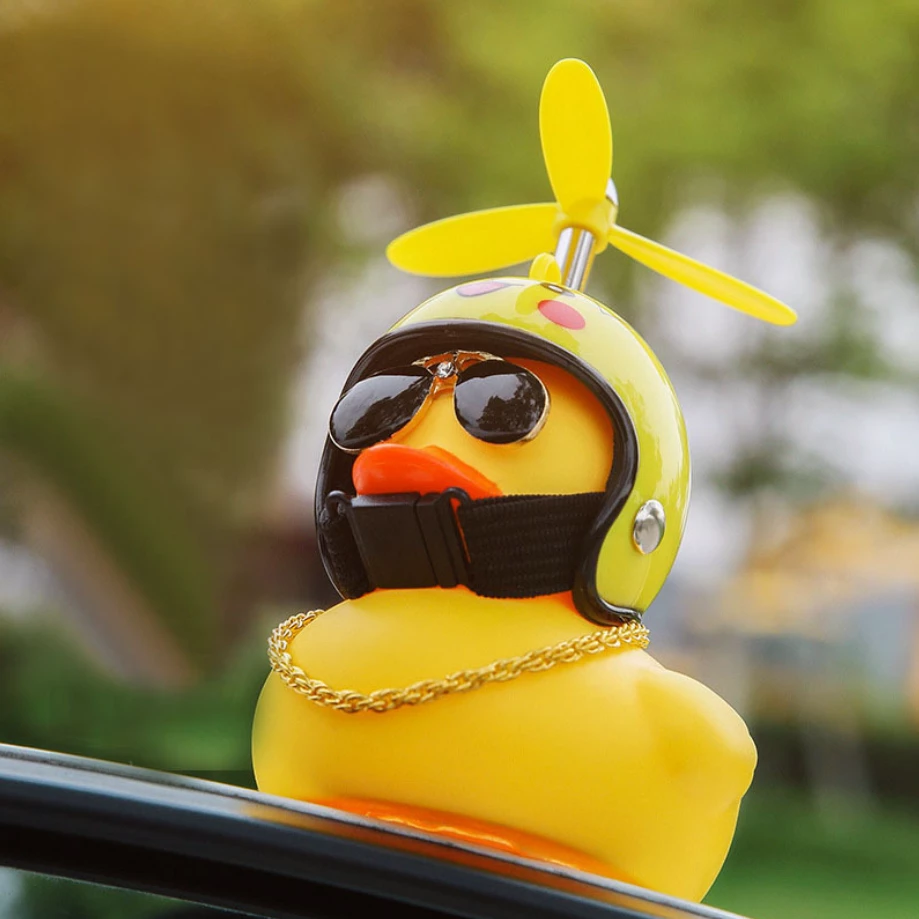

# 3a. Quality Control
>An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

#### Quality control wants to reduce the number of defected ducks sent out. Their metric of interest would be:
> <b>Recall</b><br>
They want to minimize FN<br>
FN: Thinking a defected duck is actually not defective

In [8]:
# recall
#     minimizing FN's
#     looking at the subset of data where our actual values are positive (defected ducks)

# creating recall subset, only looking at the observations/rows where the actual value was positive
subset_actual_pos = rubber_ducks_df[rubber_ducks_df.actual == 'Defect']
subset_actual_pos

# # calculating the recall by comparing the TP predictions with the total actual positive outcomes (TP + FN)
model1_recall = (subset_actual_pos.actual == subset_actual_pos.model1).mean()
print(f'model1 Recall: {model1_recall:.2%}')

model2_recall = (subset_actual_pos.actual == subset_actual_pos.model2).mean()
print(f'model1 Recall: {model2_recall:.2%}')

model3_recall = (subset_actual_pos.actual == subset_actual_pos.model3).mean()
print(f'model1 Recall: {model3_recall:.2%}')

model1 Recall: 50.00%
model1 Recall: 56.25%
model1 Recall: 81.25%


#### Quality Control should choose Model 3 since it has the highest recall of 81.25%
>We are looking to minimize our False Negatives, or the number of defective ducks we incorrectly label as non-defective

# 3b. Defective PR Duck Vacation Program
>The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?

#### The metric of interest here would be:
>Precision<br>
They want to minimize FP<br>
FN: Incorrectly predicting that a non-defective duck is defective. 

In [9]:
# for model 1, looking the subset of data where model 1 was a positive prediction, whether TP or FP
subset_pred_pos_1 = rubber_ducks_df[rubber_ducks_df.model1 == 'Defect']

# precision for model 1 is the percentage of total positive predictions were actually positive
model1_prec = (subset_pred_pos_1.actual == subset_pred_pos_1.model1).mean()
print(f'Model 1 Precision: {model1_prec:.2%}')

Model 1 Precision: 80.00%


In [10]:
# for model 2, looking the subset of data where model 2 was a positive prediction, whether TP or FP
subset_pred_pos_2 = rubber_ducks_df[rubber_ducks_df.model2 == 'Defect']

# precision for model 1 is the percentage of total positive predictions were actually positive
model2_prec = (subset_pred_pos_2.actual == subset_pred_pos_2.model2).mean()
print(f'Model 2 Precision: {model2_prec:.2%}')

Model 2 Precision: 10.00%


In [11]:
# for model 3, looking the subset of data where model 3 was a positive prediction, whether TP or FP
subset_pred_pos_3 = rubber_ducks_df[rubber_ducks_df.model3 == 'Defect']

# precision for model 1 is the percentage of total positive predictions were actually positive
model3_prec = (subset_pred_pos_3.actual == subset_pred_pos_3.model3).mean()
print(f'Model 3 Precision: {model3_prec:.2%}')

Model 3 Precision: 13.13%


#### The PR Team should choose Model 1 since it has the highest precision of 80%
>We are looking at precision since it will minimize False Positives, or the number of non-defective ducks that we incorrectly label defective

# 4. Give You Paws™

In [12]:
# importing paws dataset and writing into DataFrame
paw_df = pd.read_csv('gives_you_paws.csv')
paw_df.head()

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog


# 4a. How do the models compare to the baseline model?

In [13]:
# determining which class will be our baseline
paw_df.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

In [17]:
# adding baseline column to df
paw_df['baseline'] = 'dog'
paw_df

,actual,model1,model2,model3,model4,baseline
0,cat,cat,dog,cat,dog,dog
1,dog,dog,cat,cat,dog,dog
2,dog,cat,cat,cat,dog,dog
3,dog,dog,dog,cat,dog,dog
4,cat,cat,cat,dog,dog,dog
...,...,...,...,...,...,...
4995,dog,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog,dog
4997,dog,cat,cat,dog,dog,dog
4998,cat,cat,cat,cat,dog,dog


In [25]:
# save model columns into a list (exclusing index col
models = (list(paw_df.columns)[1:])
models

['model1', 'model2', 'model3', 'model4', 'baseline']

In [27]:
# creating a for loop that calculates the accuracy for each model column
for model in models:
    accuracy = (paw_df.actual == paw_df[model]).mean()
    print(f'{model} Accuracy: {accuracy:.2%}')

model1 Accuracy: 80.74%
model2 Accuracy: 63.04%
model3 Accuracy: 50.96%
model4 Accuracy: 74.26%
baseline Accuracy: 65.08%


#### Models 1 and 4 accuracy beat the baseline, with Model 1 accuracy being the highest
#### Models 2 and 3 accuracy do not beat the baseline, with Model 3 being the lowest

# 4b. Dog Team | Phase I
>Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? <br>For Phase II?

Phase 1: Minimize misses [FN] ---> chances that we incorrectly labeled a dog a cat

# 4b. Dog Team | Phase II
>Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recomend for Phase I? <br>For Phase II?

Phase 2: Minimize misses [FP] ---> chances that we incorrectly labeled a cat a dog

# 4c. Cat Team